In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray
from datetime import datetime, date
import json
import geopandas as gpd
import requests
import matplotlib.pyplot as plt

In [2]:
# Select modeling domain
domain = 'BRIS'
# data location
datapath = '/nfs/attic/dfh/2020_NPRB/data/'
# SM forcing files 
SMdatapath = datapath+'SMinputs/'+domain+'/'
# met tif
mettif = SMdatapath+'/2018100100.tif'

# historical data - na
path_hist = '/nfs/attic/dfh/data/climate_na_et/Normal_1991_2020_monthly/'
# future data - na
path_fut = '/nfs/attic/dfh/data/climate_na_et/ensemble_8GCMs_ssp585_2071_2100/'
# historical  data - domain
path_hist_out = datapath+'climate_na_et/Normal_1991_2020_monthly/'+domain+'/'
# future ET data - domain
path_fut_out = datapath+'climate_na_et/ensemble_8GCMs_ssp585_2071_2100/'+domain+'/'

## temp, prec change

Temp_dif = future - historic

Pr_dif = future/historic

In [3]:
# months of the year
mos = [12,1,2,3,4,5,6,7,8,9,10,11,12,1]
# month labels
molab = [0.5,1,2,3,4,5,6,7,8,9,10,11,12,12.5]

# load xarray datasets
# reference data - one timeslice of met data 
refdata = xr.open_dataarray(mettif)

#average temp
# create empty array to store monthly files 
datadif = np.empty([14,len(refdata.y),len(refdata.x)])
for i in range(len(mos)):
    # load climate na data at full extent
    pathhist = path_hist+'Normal_1991_2020_Tave'+'{:02}'.format(mos[i])+'.tif'
    print(pathhist)
    temphistdata = xr.open_dataarray(pathhist)
    # clip to domain extent and reproject to match domain
    repr_match_hist = temphistdata.rio.reproject_match(refdata)
    # load climate na data at full extent
    pathfut = path_fut+'ensemble_8GCMs_ssp585_2071_2100_Tave'+'{:02}'.format(mos[i])+'.tif'
    print(pathfut)
    tempfutdata = xr.open_dataarray(pathfut)
    # clip to domain extent and reproject to match domain
    repr_match_fut = tempfutdata.rio.reproject_match(refdata)
    # difference
    datadiftmp = repr_match_fut.values - repr_match_hist.values
    # replace nan with 0 
    datadiftmp = np.where(np.isnan(datadiftmp),0,datadiftmp)
    #add to empty data array
    datadif[i,:,:]=np.squeeze(datadiftmp)

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


/nfs/attic/dfh/data/climate_na_et/Normal_1991_2020_monthly/Normal_1991_2020_Tave12.tif
/nfs/attic/dfh/data/climate_na_et/ensemble_8GCMs_ssp585_2071_2100/ensemble_8GCMs_ssp585_2071_2100_Tave12.tif
/nfs/attic/dfh/data/climate_na_et/Normal_1991_2020_monthly/Normal_1991_2020_Tave01.tif
/nfs/attic/dfh/data/climate_na_et/ensemble_8GCMs_ssp585_2071_2100/ensemble_8GCMs_ssp585_2071_2100_Tave01.tif
/nfs/attic/dfh/data/climate_na_et/Normal_1991_2020_monthly/Normal_1991_2020_Tave02.tif
/nfs/attic/dfh/data/climate_na_et/ensemble_8GCMs_ssp585_2071_2100/ensemble_8GCMs_ssp585_2071_2100_Tave02.tif
/nfs/attic/dfh/data/climate_na_et/Normal_1991_2020_monthly/Normal_1991_2020_Tave03.tif
/nfs/attic/dfh/data/climate_na_et/ensemble_8GCMs_ssp585_2071_2100/ensemble_8GCMs_ssp585_2071_2100_Tave03.tif
/nfs/attic/dfh/data/climate_na_et/Normal_1991_2020_monthly/Normal_1991_2020_Tave04.tif
/nfs/attic/dfh/data/climate_na_et/ensemble_8GCMs_ssp585_2071_2100/ensemble_8GCMs_ssp585_2071_2100_Tave04.tif
/nfs/attic/dfh/data/

In [4]:
# build xarray data array to save out
moclip = xr.DataArray(
    datadif,
    coords={
        "month":molab,
        "y": refdata.y.values,
        "x": refdata.x.values,
    },
    dims=["month","y", "x"],
)
# convert to dataset
ds=moclip.to_dataset(name = 'tav_dif')
ds

<xarray.Dataset>
Dimensions:  (month: 14, y: 59, x: 47)
Coordinates:
  * month    (month) float64 0.5 1.0 2.0 3.0 4.0 5.0 ... 9.0 10.0 11.0 12.0 12.5
  * y        (y) float64 1.676e+06 1.654e+06 1.632e+06 ... 4.107e+05 3.885e+05
  * x        (x) float64 -8.103e+05 -7.881e+05 ... 1.887e+05 2.109e+05
Data variables:
    tav_dif  (month, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

In [5]:
#maximum temp
# create empty array to store monthly files 
datadif = np.empty([14,len(refdata.y),len(refdata.x)])
for i in range(len(mos)):
    # load climate na data at full extent
    pathhist = path_hist+'Normal_1991_2020_Tmax'+'{:02}'.format(mos[i])+'.tif'
    print(pathhist)
    temphistdata = xr.open_dataarray(pathhist)
    # clip to domain extent and reproject to match domain
    repr_match_hist = temphistdata.rio.reproject_match(refdata)
    # load climate na data at full extent
    pathfut = path_fut+'ensemble_8GCMs_ssp585_2071_2100_Tmax'+'{:02}'.format(mos[i])+'.tif'
    print(pathfut)
    tempfutdata = xr.open_dataarray(pathfut)
    # clip to domain extent and reproject to match domain
    repr_match_fut = tempfutdata.rio.reproject_match(refdata)
    # difference
    datadiftmp = repr_match_fut.values - repr_match_hist.values
    # replace nan with 0 
    datadiftmp = np.where(np.isnan(datadiftmp),0,datadiftmp)
    #add to empty data array
    datadif[i,:,:]=np.squeeze(datadiftmp)
ds['tmx_dif'] = (['month','y', 'x'], datadif )
#minimum temp
# create empty array to store monthly files 
datadif = np.empty([14,len(refdata.y),len(refdata.x)])
for i in range(len(mos)):
    # load climate na data at full extent
    pathhist = path_hist+'Normal_1991_2020_Tmin'+'{:02}'.format(mos[i])+'.tif'
    print(pathhist)
    temphistdata = xr.open_dataarray(pathhist)
    # clip to domain extent and reproject to match domain
    repr_match_hist = temphistdata.rio.reproject_match(refdata)
    # load climate na data at full extent
    pathfut = path_fut+'ensemble_8GCMs_ssp585_2071_2100_Tmin'+'{:02}'.format(mos[i])+'.tif'
    print(pathfut)
    tempfutdata = xr.open_dataarray(pathfut)
    # clip to domain extent and reproject to match domain
    repr_match_fut = tempfutdata.rio.reproject_match(refdata)
    # difference
    datadiftmp = repr_match_fut.values - repr_match_hist.values
    # replace nan with 0 
    datadiftmp = np.where(np.isnan(datadiftmp),0,datadiftmp)
    #add to empty data array
    datadif[i,:,:]=np.squeeze(datadiftmp)
ds['tmn_dif'] = (['month','y', 'x'], datadif )
# precipitation
# create empty array to store monthly files 
datadif = np.empty([14,len(refdata.y),len(refdata.x)])
for i in range(len(mos)):
    # load climate na data at full extent
    pathhist = path_hist+'Normal_1991_2020_PPT'+'{:02}'.format(mos[i])+'.tif'
    print(pathhist)
    temphistdata = xr.open_dataarray(pathhist)
    # clip to domain extent and reproject to match domain
    repr_match_hist = temphistdata.rio.reproject_match(refdata)
    # load climate na data at full extent
    pathfut = path_fut+'ensemble_8GCMs_ssp585_2071_2100_PPT'+'{:02}'.format(mos[i])+'.tif'
    print(pathfut)
    tempfutdata = xr.open_dataarray(pathfut)
    # clip to domain extent and reproject to match domain
    repr_match_fut = tempfutdata.rio.reproject_match(refdata)
    # difference
    datadiftmp = repr_match_fut.values/repr_match_hist.values
    # replace nan with 1
    datadiftmp = np.where(np.isnan(datadiftmp),1,datadiftmp)
    #add to empty data array
    datadif[i,:,:]=np.squeeze(datadiftmp)
ds['pr_dif'] = (['month','y', 'x'], datadif )
ds

/nfs/attic/dfh/data/climate_na_et/Normal_1991_2020_monthly/Normal_1991_2020_Tmax12.tif
/nfs/attic/dfh/data/climate_na_et/ensemble_8GCMs_ssp585_2071_2100/ensemble_8GCMs_ssp585_2071_2100_Tmax12.tif
/nfs/attic/dfh/data/climate_na_et/Normal_1991_2020_monthly/Normal_1991_2020_Tmax01.tif
/nfs/attic/dfh/data/climate_na_et/ensemble_8GCMs_ssp585_2071_2100/ensemble_8GCMs_ssp585_2071_2100_Tmax01.tif
/nfs/attic/dfh/data/climate_na_et/Normal_1991_2020_monthly/Normal_1991_2020_Tmax02.tif
/nfs/attic/dfh/data/climate_na_et/ensemble_8GCMs_ssp585_2071_2100/ensemble_8GCMs_ssp585_2071_2100_Tmax02.tif
/nfs/attic/dfh/data/climate_na_et/Normal_1991_2020_monthly/Normal_1991_2020_Tmax03.tif
/nfs/attic/dfh/data/climate_na_et/ensemble_8GCMs_ssp585_2071_2100/ensemble_8GCMs_ssp585_2071_2100_Tmax03.tif
/nfs/attic/dfh/data/climate_na_et/Normal_1991_2020_monthly/Normal_1991_2020_Tmax04.tif
/nfs/attic/dfh/data/climate_na_et/ensemble_8GCMs_ssp585_2071_2100/ensemble_8GCMs_ssp585_2071_2100_Tmax04.tif
/nfs/attic/dfh/data/

<xarray.Dataset>
Dimensions:  (month: 14, y: 59, x: 47)
Coordinates:
  * month    (month) float64 0.5 1.0 2.0 3.0 4.0 5.0 ... 9.0 10.0 11.0 12.0 12.5
  * y        (y) float64 1.676e+06 1.654e+06 1.632e+06 ... 4.107e+05 3.885e+05
  * x        (x) float64 -8.103e+05 -7.881e+05 ... 1.887e+05 2.109e+05
Data variables:
    tav_dif  (month, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    tmx_dif  (month, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    tmn_dif  (month, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    pr_dif   (month, y, x) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0

In [7]:
# save as netcdf
path = path_hist_out+'monthly_climatena_dif.nc'
ds.to_netcdf(path)

In [8]:
ds

<xarray.Dataset>
Dimensions:  (month: 14, y: 59, x: 47)
Coordinates:
  * month    (month) float64 0.5 1.0 2.0 3.0 4.0 5.0 ... 9.0 10.0 11.0 12.0 12.5
  * y        (y) float64 1.676e+06 1.654e+06 1.632e+06 ... 4.107e+05 3.885e+05
  * x        (x) float64 -8.103e+05 -7.881e+05 ... 1.887e+05 2.109e+05
Data variables:
    tav_dif  (month, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    tmx_dif  (month, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    tmn_dif  (month, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    pr_dif   (month, y, x) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0

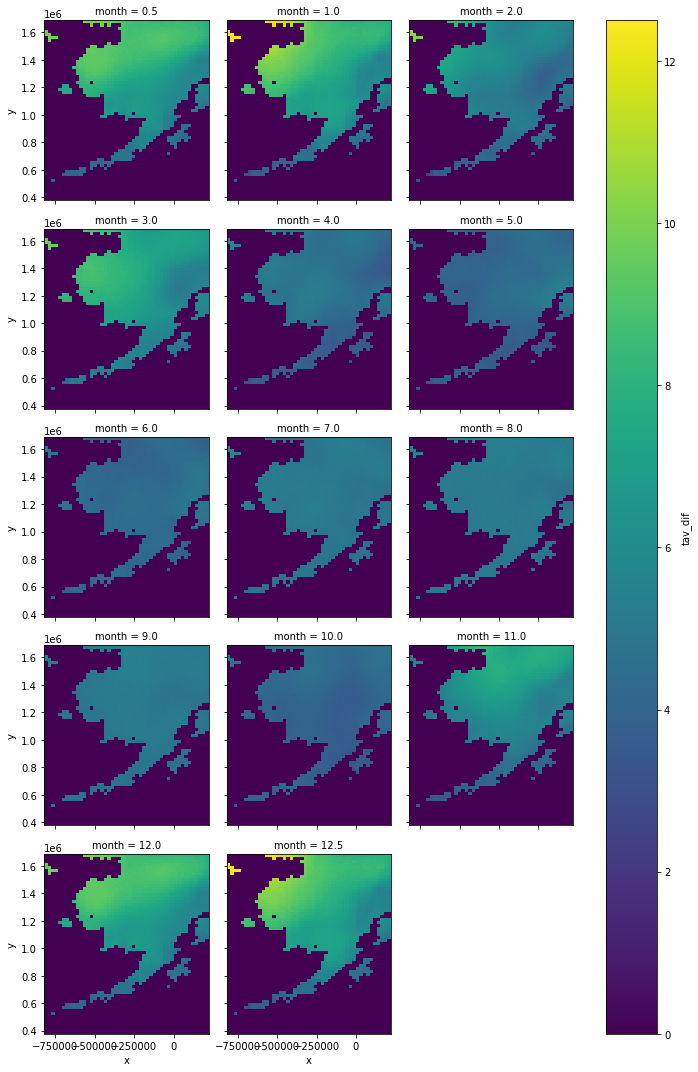

In [9]:
t_simple = ds.tav_dif.plot(x="x", y="y", col="month", col_wrap=3)

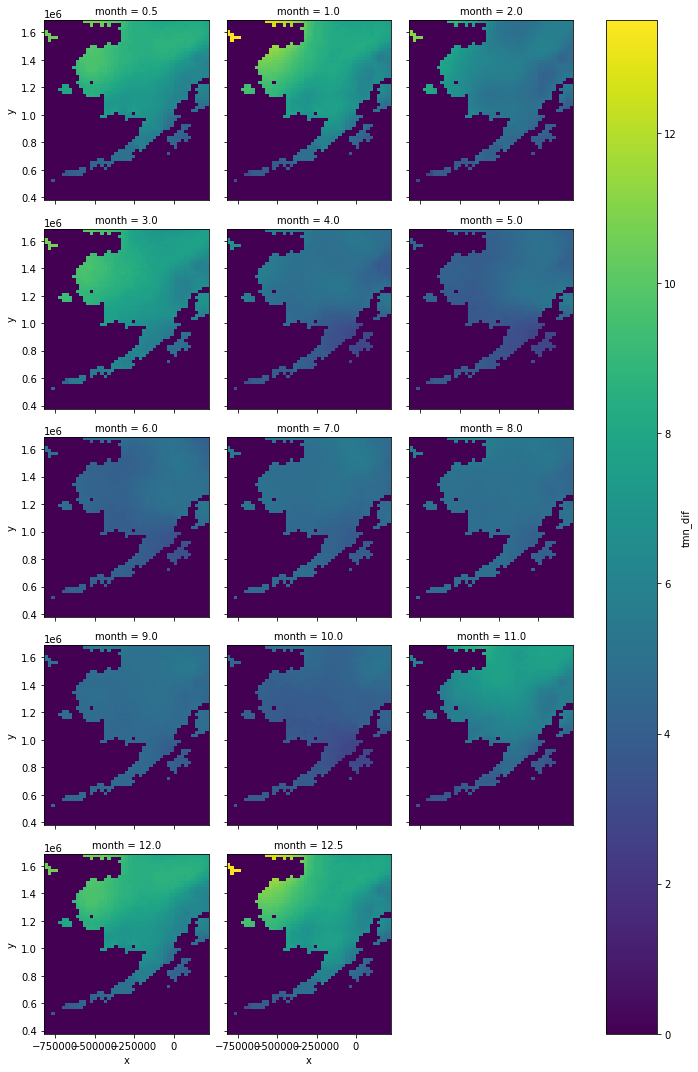

In [10]:
t_simple = ds.tmn_dif.plot(x="x", y="y", col="month", col_wrap=3)

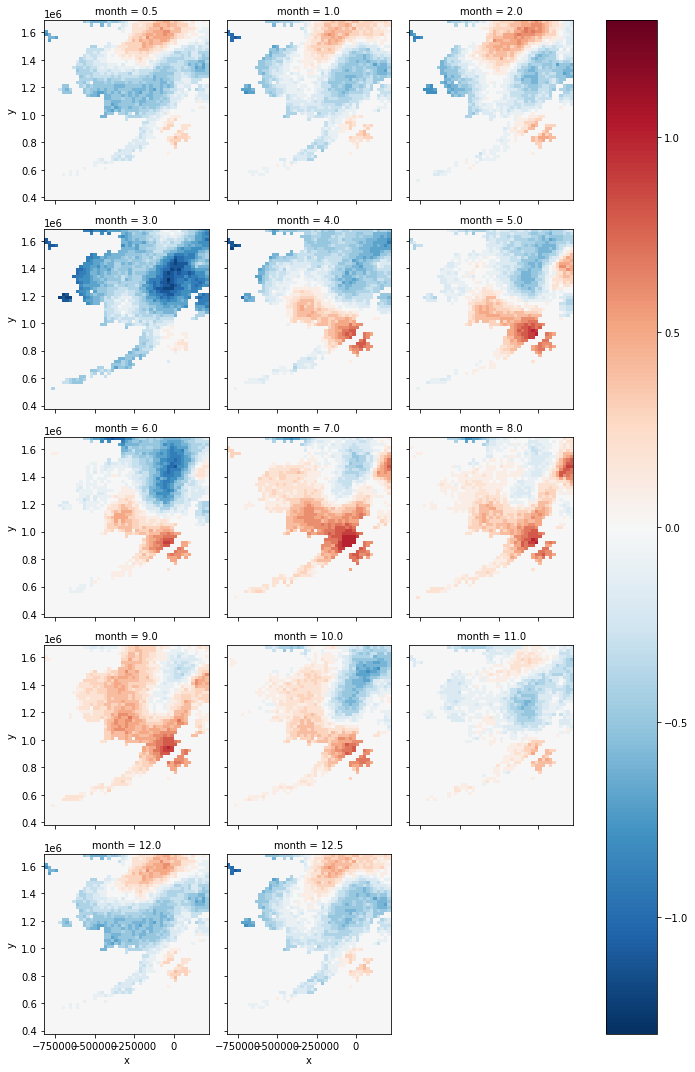

In [11]:
t_simple = (ds.tav_dif-ds.tmn_dif).plot(x="x", y="y", col="month", col_wrap=3)

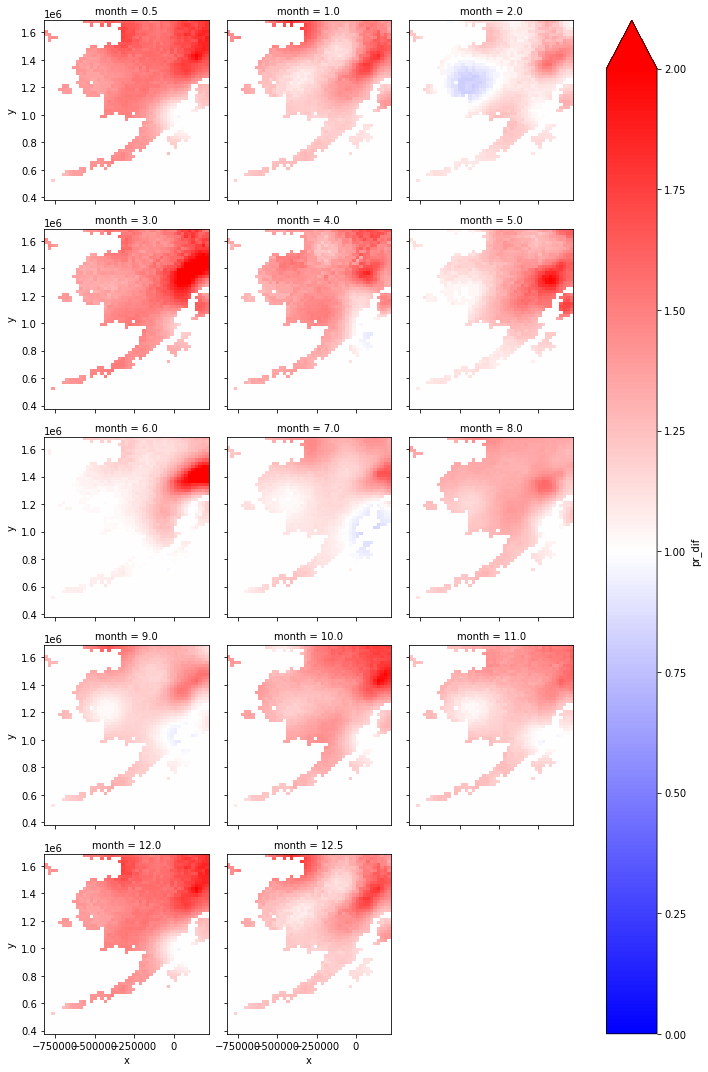

In [12]:
p_simple = ds.pr_dif.plot(x="x", y="y", col="month", col_wrap=3,vmin=0,vmax=2,cmap='bwr')